In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from torchvision import datasets, transforms
from torch.utils.data import DataLoader 

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
device

'cuda'

In [5]:
transform = transforms.Compose([
    transforms.ToTensor()
])
train_darasets = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [6]:
num_bathes = 100

In [7]:
train_dataloader = DataLoader(train_darasets, batch_size=num_bathes, shuffle=True)

In [8]:
train_iter = iter(train_dataloader)

In [9]:
imgs, labels = train_iter.next()

In [9]:
imgs.size()

torch.Size([100, 1, 28, 28])

In [ ]:
labels

tensor([5, 7, 6, 0, 8, 1, 1, 7, 9, 4, 6, 0, 0, 0, 3, 5, 2, 7, 5, 5, 5, 8, 4, 1,
        0, 6, 2, 8, 6, 1, 6, 5, 4, 2, 3, 5, 8, 8, 4, 7, 4, 2, 9, 5, 7, 7, 5, 3,
        1, 5, 3, 0, 7, 1, 2, 1, 2, 5, 3, 1, 5, 0, 1, 4, 9, 2, 5, 3, 2, 2, 2, 7,
        6, 5, 2, 5, 7, 3, 3, 7, 6, 0, 4, 9, 0, 5, 6, 1, 4, 8, 9, 3, 7, 6, 6, 4,
        3, 7, 9, 2])

In [10]:
img = imgs[0]
img_permute = img.permute(1, 2, 0)#channel first に変更

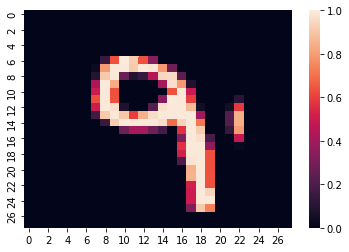

In [11]:
sns.heatmap(img_permute.numpy()[:, :, 0])#2次元配列へ

In [ ]:
labels[0]

tensor(3)

In [12]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.classifier = nn.Sequential(
            nn.Linear(28 * 28, 400),
            nn.ReLU(inplace=True),
            nn.Linear(400, 200),
            nn.ReLU(inplace=True),
            nn.Linear(200, 100),
            nn.ReLU(inplace=True),
            nn.Linear(100, 10)
        )
    def forward(self, x):
        output = self.classifier(x)
        return output

In [13]:
model = MLP()

In [14]:
model.to(device)#GPUで計算できるようにモデルをPUに送る

MLP(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=400, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=400, out_features=200, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [16]:
num_epochs = 15
losses = []
accuracy = []
for epoch in range(num_epochs):
  running_loss = 0.0
  running_accuracy = 0.0
  for imgs, labels in train_dataloader:#ミニバッチサイズは１００なのでランダムに１００枚の画像をとってきて学習し、この作業を６万÷１００＝６００で６００回繰り返すことになる。６００回くりして１エポックである。
    imgs = imgs.view(num_bathes, -1)
    imgs = imgs.to(device)
    labels = labels.to(device)
    optimizer.zero_grad()
    output = model(imgs)
    loss = criterion(output, labels)
    running_loss += loss.item()#loss誤差の値を加えてる
    pred = torch.argmax(output, dim=1) #outputの数字の番号を予測をpredに格納
    running_accuracy += torch.mean(pred.eq(labels).float())
    loss.backward()#誤差逆伝播
    optimizer.step()#重みの更新
  running_loss /= len(train_dataloader)#特殊メソッドlen()を使用。６００で割って誤差を平均化
  running_accuracy /= len(train_dataloader)
  losses.append(running_loss)
  accuracy.append(running_accuracy)
  print('epoch: {}, loss: {}, acc: {} '.format(epoch, running_loss, running_accuracy))


epoch: 0, loss: 0.312043006826813, acc: 0.9072504639625549 
epoch: 1, loss: 0.10930356208235026, acc: 0.9672169089317322 
epoch: 2, loss: 0.07238157310833533, acc: 0.9770323634147644 
epoch: 3, loss: 0.050298812995897606, acc: 0.9842986464500427 
epoch: 4, loss: 0.03967550527226801, acc: 0.9872816205024719 
epoch: 5, loss: 0.03219320531876292, acc: 0.989681601524353 
epoch: 6, loss: 0.026002347082151878, acc: 0.9914153218269348 
epoch: 7, loss: 0.021742545250842037, acc: 0.992732048034668 
epoch: 8, loss: 0.020016276821794843, acc: 0.9934319257736206 
epoch: 9, loss: 0.01658089498099192, acc: 0.9943485856056213 
epoch: 10, loss: 0.01771409193198148, acc: 0.9945318698883057 
epoch: 11, loss: 0.011998164585056656, acc: 0.9961819648742676 
epoch: 12, loss: 0.013678980565800884, acc: 0.9954653382301331 
epoch: 13, loss: 0.01348305580939268, acc: 0.9956654906272888 
epoch: 14, loss: 0.009812602258498372, acc: 0.997249186038971 


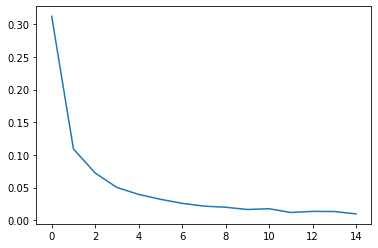

In [17]:
plt.plot(losses)

以上の結果から、学習が進むにつれて誤差が減少していることが分かる

In [21]:
train_iter = iter(train_dataloader)
imgs, labels = train_iter.next()
labels

tensor([9, 8, 9, 2, 3, 8, 8, 5, 7, 7, 0, 7, 6, 0, 3, 7, 9, 7, 5, 6, 0, 9, 1, 2,
        2, 7, 5, 5, 4, 8, 6, 8, 0, 7, 6, 2, 7, 0, 4, 4, 5, 5, 4, 9, 7, 7, 8, 0,
        4, 1, 8, 2, 8, 2, 4, 0, 5, 1, 3, 8, 8, 1, 4, 0, 4, 9, 2, 2, 8, 6, 4, 4,
        4, 1, 3, 4, 2, 7, 0, 8, 5, 9, 3, 9, 3, 9, 1, 1, 5, 0, 7, 4, 9, 5, 1, 7,
        9, 6, 2, 4])

In [22]:
imgs_gpu = imgs.view(100, -1).to(device)#テストデータのサイズを変更
output= model(imgs_gpu)#モデルにテストデータを入力
pred = torch.argmax(output, dim=1)#入力したテストデータの出力として最も有力な候補の数字番号を格納
pred#予測の結果

tensor([9, 8, 9, 2, 3, 8, 8, 5, 7, 7, 0, 7, 6, 0, 3, 7, 9, 7, 5, 6, 0, 9, 1, 2,
        2, 7, 5, 5, 4, 8, 6, 8, 0, 7, 6, 2, 7, 0, 4, 4, 5, 5, 4, 9, 7, 7, 8, 0,
        4, 1, 8, 2, 8, 2, 4, 0, 5, 1, 3, 8, 8, 1, 4, 0, 4, 9, 2, 2, 8, 6, 4, 4,
        4, 1, 3, 4, 2, 7, 0, 8, 5, 9, 3, 9, 3, 9, 1, 1, 5, 0, 7, 4, 9, 5, 1, 7,
        9, 6, 2, 4], device='cuda:0')

上の二つのセルの結果を見比べると、手書き数字をほぼ判別できていることが分かる。

In [23]:
#modelのパラメータの数字を保存しておく
params = model.state_dict()
torch.save(params, "model.prm")

In [24]:
#パラメータのロードの際は
#param_load = torch.load("model.prm")
#model.load_state_dict(param_load)